<a href="https://colab.research.google.com/github/raghav5102/ML-prediction-models/blob/main/Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TO IDENTIFY DIFFERENT TYPES OF GLASS USING RANDOM FOREST CLASSIFIER


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('Train.csv')
df.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [ ]:
dft=pd.read_csv('Test.csv')
dft.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


In [ ]:
clf=RandomForestClassifier(n_estimators=1000)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y_train=df['class']


In [ ]:
X_train=df.drop('class',axis=1)

In [ ]:
X_test=dft

In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from fastai.imports import *

In [ ]:

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(clf, X_train); 

In [ ]:
fi

,cols,imp
3,thickness,0.141131
9,log_area,0.085793
8,pixel_area,0.085542
4,xmin,0.081171
6,ymin,0.080339
5,xmax,0.079607
7,ymax,0.079474
2,max_luminosity,0.077915
12,x_component_3,0.072260
10,x_component_1,0.071961


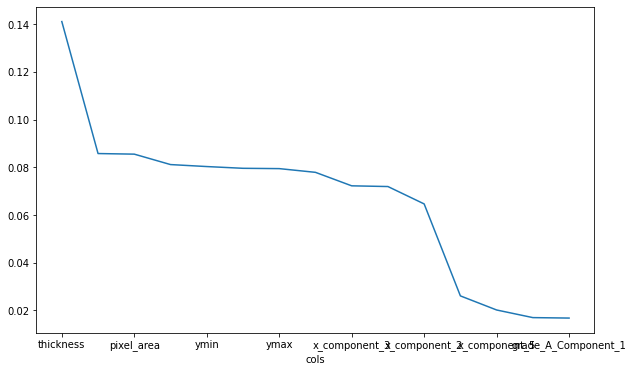

In [ ]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [ ]:
clf.score(X_train,y_train)

1.0

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_test=clf.predict_proba(X_test)

In [ ]:
y_test

array([[0.993, 0.007],
       [0.192, 0.808],
       [0.888, 0.112],
       ...,
       [0.992, 0.008],
       [0.65 , 0.35 ],
       [0.967, 0.033]])

In [ ]:
ydf=pd.DataFrame(y_test)

In [ ]:

ydf

,0,1
0,0.993,0.007
1,0.192,0.808
2,0.888,0.112
3,0.923,0.077
4,0.510,0.490
...,...,...
578,0.717,0.283
579,0.933,0.067
580,0.992,0.008
581,0.650,0.350


In [ ]:
ydf.rename({'0': '1', '1': '2'}, axis=1, inplace=True)
ydf

,0,1
0,0.993,0.007
1,0.192,0.808
2,0.888,0.112
3,0.923,0.077
4,0.510,0.490
...,...,...
578,0.717,0.283
579,0.933,0.067
580,0.992,0.008
581,0.650,0.350


In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
ydf.to_xlsx('glasssub.xlsx',index=False)
!cp glass.xlsx "drive/My Drive/"

AttributeError: ignored